<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [0]:
result

<Response [200]>

In [0]:
type(result)

requests.models.Response

In [0]:
result.text

'<!doctype html>\n<html>\n\r\n<!-- Mirrored from us.pycon.org/2018/schedule/talks/list/ by HTTrack Website Copier/3.x [XR&CO\'2014], Tue, 10 Jul 2018 13:45:12 GMT -->\r\n<!-- Added by HTTrack --><meta http-equiv="content-type" content="text/html;charset=utf-8" /><!-- /Added by HTTrack -->\r\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2018 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2018/site_media/static/css/slight.a3c1b1430280.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" href="/2018/site_media/static/cache/css/411162ab63b1.css" type="text/css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2018/sit

In [0]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [0]:
soup

In [0]:
type(soup)

bs4.BeautifulSoup

In [0]:
soup.select('h2')

In [0]:
type(soup.select('h2'))

list

In [0]:
len(soup.select('h2'))

95

In [0]:
first = soup.select('h2')[0]

first

<h2>
<a href="/2018/schedule/presentation/127/" id="presentation-127">
        A Bit about Bytes: Understanding Python Bytecode
      </a>
</h2>

In [0]:
type(first)

bs4.element.Tag

In [0]:
first.text

'\n\n        A Bit about Bytes: Understanding Python Bytecode\n      \n'

In [0]:
type(first.text)

str

In [0]:
first.text.strip()

'A Bit about Bytes: Understanding Python Bytecode'

In [0]:
type(soup.select('h2')[-1]), type(soup.select('h2')[-1:])

(bs4.element.Tag, list)

In [0]:
soup.select('h2')[-1:].text

AttributeError: ignored

In [0]:
print(soup.select('h2')[-1]) 

print('\n')

print(soup.select('h2')[-1:])

In [0]:
print(type(soup.select('h2')[-1])) 

print('\n')

print(type(soup.select('h2')[-1:]))

In [0]:
titles = []
for tag in soup.select('h2'):
    tag.text.strip()
    titles.append(titles)
    
titles = [tag.text.strip() 
          for tag in soup.select('h2')]

In [0]:
type(titles), len(titles)

In [0]:
titles[0], titles[-1]

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [0]:
for title in titles:
    if len(title) > 80:
        print(title)

In [0]:
long_titles = []
for title in titles:
    if len(title) > 80:
        long_titles.append(title)
        
long_titles

### 2. List Comprehension

In [0]:
[title for title in titles 
 if len(title) > 80]

### 3. Filter with named function

In [0]:
def long(title):
    return len(title) > 80

list(filter(long, titles))

### 4. Filter with anonymous function

In [0]:
list(filter(lambda t: len(t) > 80, titles))

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [0]:
df = pd.DataFrame({'title': titles})
df[df.title.str.len() > 80]

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df.title.apply(len)

In [0]:
df[df['title length'] > 80]

In [0]:
df.loc[df['title length'] > 80, 'title length']

### long title

In [0]:
df['long title'] = df['title length'] > 80

In [0]:
df[df['long title']==True]

In [0]:
df[df['long title']]

### first letter

In [0]:
title = 'Debugging PySpark'
first_letter = title[0]

first_letter

In [0]:
df['first letter'] = df.title.str[0]

In [0]:
df[df['first letter']=='P']

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

In [0]:
import textstat

In [0]:
first = df.title.values[0]
last = df.title.values[-1]

first, last

In [0]:
textstat.lexicon_count(first), textstat.lexicon_count(last)

In [0]:
df['title word count'] = df.title.apply(textstat.lexicon_count)

In [0]:
df[df['title word count'] <= 3]

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length': 'title character count'})

In [0]:
df.columns

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [0]:
df.describe()

In [0]:
df.describe(include='all')

In [0]:
import numpy as np
df.describe(exclude=np.number)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [0]:
df.sort_values(by='title character count').head(5)

Titles sorted reverse alphabetically

In [0]:
df['first letter'] = df['first letter'].str.upper()

In [0]:
df.sort_values(by='first letter', ascending=False)

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [0]:
df['first letter'].value_counts()

Percentage of talks with long titles

In [0]:
df['long title'].value_counts() / len(df) * 100

In [0]:
df['long title'].value_counts(normalize=True) * 100

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

In [0]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head(5)
 .plot
 .barh(color='grey', 
       title='Top 5 most frequent first letters, PyCon 2018 talks'));

Histogram of title lengths, in characters

In [0]:
title = 'Distribution of title length, in characters'
df['title character count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [200]:
!pip install textstat
import numpy as np
import bs4, requests
import textstat
import pandas as pd
pd.options.display.max_colwidth = 200
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://us.pycon.org/2018/schedule/talks/list/'

# scrap data to list
result = requests.get(url)
soup = bs4.BeautifulSoup(result.text,'html.parser')
clean_description =[i.text.strip() for i in soup.select('.presentation-description')]

print(len(clean_description))
print(clean_description)

95
["At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in those files? Well, wonder no more! In this talk you'll learn what Python bytecode is and how it's used to execute your code, as well as how to decipher and read it, and how to reason about bytecode to understand the performance of your Python code.", "Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learning the Java infrastructure, memory management, configuration management. The multiple layers of indirection also make it harder to debug things, especially when throwing the Pyspark wrapper into the equation.\r\n\r\nWith Dask emerging as a pure Python framework for parallel computing, Python developers might be looking at it with new hope, wondering if i

In [201]:
# description
# description character count
# description word count
# description grade level (use this textstat function to get the Flesh-Kincaid grade level)

# create data frame
df=pd.DataFrame()
# Add columns
df['description'] = clean_description
df['description character count'] = df.description.apply(len)
df['description word count'] = df.description.apply(textstat.lexicon_count)
df['description grade level'] = df.description.apply(textstat.flesch_kincaid_grade)

# resource - https://pypi.org/project/textstat/

print(df.shape)
df.head()



(95, 4)


,description,description character count,description word count,description grade level
0,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4
1,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3
2,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9
3,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0
4,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0


In [0]:
# average description word count? The minimum? The maximum?
print('Average description word count:', df['description word count'].mean())
print('Minimum description word count:', df['description word count'].min())
print('Maximum description word count:', df['description word count'].max())

print(df.describe())




Average description word count: 134.6315789473684
Minimum description word count: 35
Maximum description word count: 436
       description character count  description word count  \
count                    95.000000               95.000000   
mean                    846.273684              134.631579   
std                     450.084565               70.022953   
min                     201.000000               35.000000   
25%                     550.000000               91.500000   
50%                     762.000000              119.000000   
75%                     978.000000              150.000000   
max                    2794.000000              436.000000   

       description grade level  
count                95.000000  
mean                 18.132632  
std                  15.838127  
min                   3.700000  
25%                  10.500000  
50%                  13.800000  
75%                  17.950000  
max                 107.800000  


In [0]:
print("These index in dataframe can fit tweet limit of 280 characters \n")
print(df.loc[df['description character count'] < 281, 'description character count'])
print('Index 44 description:',df['description'].loc[44])
print('Index 62 description:',df['description'].loc[62])
print('Index 65 description:',df['description'].loc[65])





These index in dataframe can fit tweet limit of 280 characters 

44    231
62    201
65    262
Name: description character count, dtype: int64
Index 44 description: A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and guidelines I give again and again.
Index 62 description: For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the country.
Index 65 description: Python 3 removes a lot of the confusion around Unicode handling in Python, but that by no means fixes everything. Different locales and writing systems have unique behaviours that can trip you up. Hereâs some of the worst ones and how to handle them correctly.


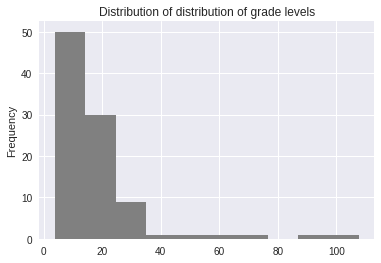

In [0]:
# What's the distribution of grade levels? Plot a histogram.
title = 'Distribution of distribution of grade levels'
df['description grade level'].plot.hist(title=title, color='grey');


In [0]:
print('description grade level')
(df['description grade level'])

description grade level


0      7.4
1     14.3
2     11.9
3     16.0
4     18.0
5      8.2
6     17.8
7     16.9
8     10.3
9     19.7
10     9.4
11    17.4
12    11.0
13    25.1
14    12.3
15    15.9
16    11.3
17    17.8
18    16.2
19    11.2
20    12.7
21    25.3
22     9.0
23    13.0
24     6.4
25    24.8
26    30.2
27    24.6
28    21.6
29    18.8
      ... 
65     6.8
66    14.6
67    24.0
68    17.7
69    68.0
70    28.8
71    11.2
72    32.5
73    29.0
74    11.7
75    14.2
76    17.7
77     6.9
78    62.2
79    10.6
80    13.5
81     8.6
82    12.7
83    10.4
84    15.5
85    11.4
86    13.2
87    10.0
88    21.5
89    16.8
90    13.3
91     7.2
92    10.1
93    14.0
94    11.5
Name: description grade level, Length: 95, dtype: float64